In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

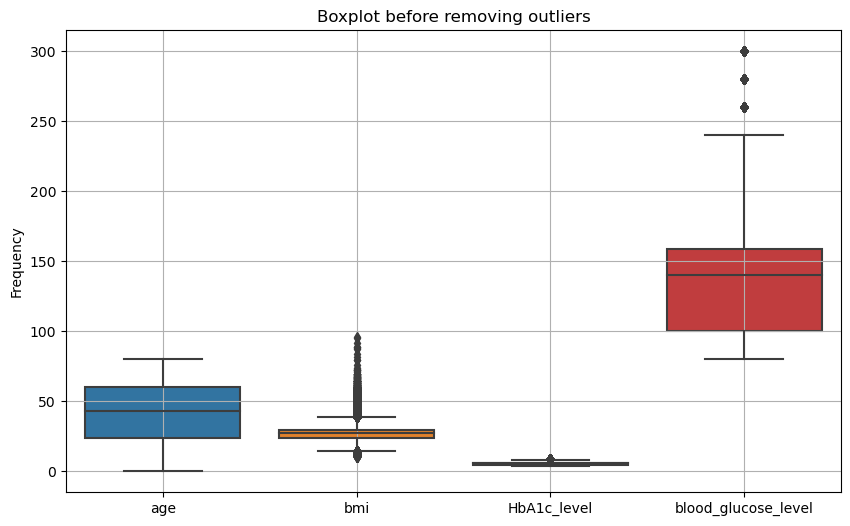

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.title("Boxplot before removing outliers")
plt.ylabel("Frequency")
plt.xticks(range(4), df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.grid(True)
plt.show()

In [5]:
data = df[['bmi', 'HbA1c_level', 'blood_glucose_level']]
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3 - Q1
UpperBound = Q3 + 1.5 * IQR
LowerBound = Q1 - 1.5 * IQR
df[['bmi', 'HbA1c_level', 'blood_glucose_level']] = df[['bmi', 'HbA1c_level', 'blood_glucose_level']].clip(lower=LowerBound, upper=UpperBound, axis=1)

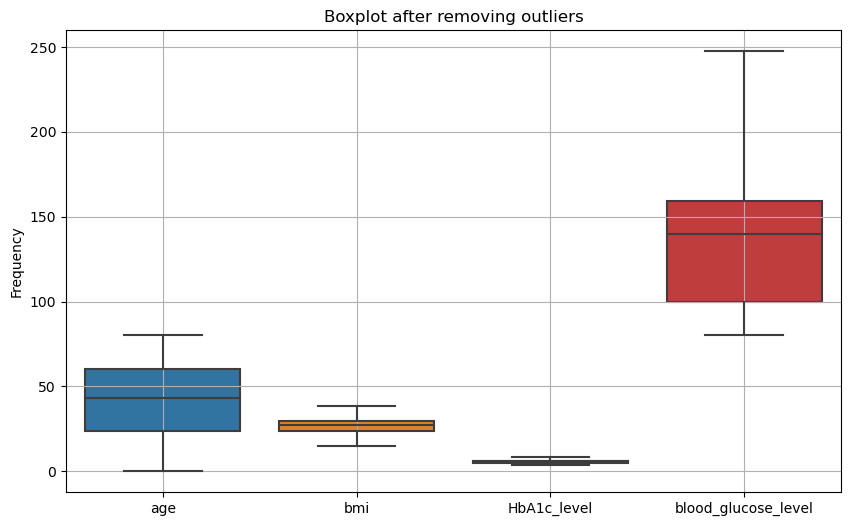

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.title("Boxplot after removing outliers")
plt.ylabel("Frequency")
plt.xticks(range(4), df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.grid(True)
plt.show()

In [7]:
df['gender'] = pd.factorize(df['gender'])[0] + 1
df['smoking_history'] = pd.factorize(df['smoking_history'])[0] + 1

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140.0,0
1,1,54.0,0,0,2,27.32,6.6,80.0,0
2,2,28.0,0,0,1,27.32,5.7,158.0,0
3,1,36.0,0,0,3,23.45,5.0,155.0,0
4,2,76.0,1,1,3,20.14,4.8,155.0,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.iloc[:, :8]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

print("Training Accuracy : ", accuracy_train)
print("Testing Accuracy : ", accuracy_test)

Training Accuracy :  0.9595223880597015
Testing Accuracy :  0.9584545454545454


In [10]:
import pickle

with open('Diabetes_Predictor.pkl', 'wb') as file:
    pickle.dump(lr, file)
    
with open('Diabetes_Predictor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
prediction = loaded_model.predict(X_test)
print("Testing Accuracy : ", loaded_model.score(X_test, Y_test))

Testing Accuracy :  0.9584545454545454
